<a href="https://colab.research.google.com/github/ronitd2002/QROSS-GCN-project/blob/main/trial-notebooks/QROSS_Naive-Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# basic libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, Dataset

### Importing and normalizing the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# upload training data
from google.colab import files

uploaded_1 = files.upload()

Saving syn_tsp199.tsp to syn_tsp199.tsp
Saving syn_tsp198.tsp to syn_tsp198.tsp
Saving syn_tsp197.tsp to syn_tsp197.tsp
Saving syn_tsp196.tsp to syn_tsp196.tsp
Saving syn_tsp195.tsp to syn_tsp195.tsp
Saving syn_tsp194.tsp to syn_tsp194.tsp
Saving syn_tsp193.tsp to syn_tsp193.tsp
Saving syn_tsp192.tsp to syn_tsp192.tsp
Saving syn_tsp191.tsp to syn_tsp191.tsp
Saving syn_tsp190.tsp to syn_tsp190.tsp
Saving syn_tsp189.tsp to syn_tsp189.tsp
Saving syn_tsp188.tsp to syn_tsp188.tsp
Saving syn_tsp187.tsp to syn_tsp187.tsp
Saving syn_tsp186.tsp to syn_tsp186.tsp
Saving syn_tsp185.tsp to syn_tsp185.tsp
Saving syn_tsp139.tsp to syn_tsp139.tsp
Saving syn_tsp138.tsp to syn_tsp138.tsp
Saving syn_tsp137.tsp to syn_tsp137.tsp
Saving syn_tsp136.tsp to syn_tsp136.tsp
Saving syn_tsp135.tsp to syn_tsp135.tsp
Saving syn_tsp134.tsp to syn_tsp134.tsp
Saving syn_tsp133.tsp to syn_tsp133.tsp
Saving syn_tsp132.tsp to syn_tsp132.tsp
Saving syn_tsp131.tsp to syn_tsp131.tsp
Saving syn_tsp130.tsp to syn_tsp130.tsp


In [9]:
import os

graphs = {}
index = 0

for filename, file_data in uploaded_1.items():
    file_content = file_data.decode('utf-8')

    start_collecting = False
    coordinates = []

    for line in file_content.splitlines():
        if "NODE_COORD_SECTION" in line:
            start_collecting = True
            continue

        if "EOF" in line or line.strip() == '':
            break

        if start_collecting:
            parts = line.split()
            if len(parts) >= 3:
                # Append [x, y] coordinates (ignore the first column)
                coordinates.append([float(parts[1]), float(parts[2])])

    graphs[index] = coordinates
    index += 1

In [5]:
for graph in graphs:
    print(f"Instance: {graph}\nCoordinates: {graphs[graph]}\n")
    break

Instance: 0
Coordinates: [[190.90116849279775, 590.4280175750611], [166.92708168528983, 530.2271396316246], [1085.991923849472, 16.922422544709608], [481.1400572117718, 1646.5622569153477], [13.17437595135608, 29.384015131643572], [579.5977925840228, 183.09074463391653], [3152.535909779576, 469.4891656526584], [56.79395127865876, 335.7676041800954], [140.16984710530528, 1415.9907047276663], [298.4056652503395, 432.6438567934434], [1329.4159078188572, 398.07979715224917], [184.34432775505695, 310.6223243278328], [1413.9458436791929, 71.70924057019577], [229.8380192520161, 12.507313429062522], [119.85732963663749, 267.10190426680424], [1068.128373699216, 72.16722331618915], [4.4735957948030896, 260.74107597220853], [315.9927811661698, 453.1032177042161], [74.37417532866615, 462.03510416808166], [391.5463212784245, 568.466736501489], [20.04917685531651, 200.4640408371322], [230.93189213865705, 1251.8991123066855], [1572.7308604790571, 269.1672960446028], [592.4233980658983, 398.9286635813

In [6]:
print(f"Euclidean coordinates of the 35th graph instance are:")
graphs[35]

Euclidean coordinates of the 35th graph instance are:


[[7207.304443622209, 7324.167128487795],
 [4163.142976744452, 433.4999525698357],
 [2490.932722533464, 4875.366088798042],
 [4551.5205625801955, 2982.122152631126],
 [6763.789886532631, 1030.9891543093809],
 [1192.5835434616927, 6609.37024934381],
 [4233.957584681043, 4034.951770206021],
 [2636.353709072561, 6386.539680951245],
 [5349.1546667631965, 9770.2454151319],
 [5350.938714803364, 7417.2756867157395],
 [3603.702035972396, 966.7842507669433],
 [8336.904519630016, 1307.823731512655],
 [2250.7038620979292, 6451.865150099256],
 [9410.524952419511, 6731.366335870505],
 [8976.457769795643, 8503.88983386449],
 [1713.7074001514418, 1096.4539677469254],
 [2822.1366695079887, 5066.67013828053],
 [3449.0565250305203, 9008.22163939093],
 [7599.90158431922, 6101.292179054742],
 [6282.968640320806, 5723.651901213904],
 [5377.336280017825, 658.9912628221895],
 [5782.466661739941, 3623.846327413507],
 [2612.0291245340845, 6706.035485758186],
 [7905.677924103369, 723.4527207413255],
 [8687.76013

In [7]:
print(f"We have {len(graphs)} graphs each having {len(graphs[0])} [x,y] coordinate points")

We have 85 graphs each having 30 [x,y] coordinate points


In [8]:
# upload training data
from google.colab import files

uploaded_2 = files.upload()

Saving syn_tsp199_instance1.csv to syn_tsp199_instance1.csv
Saving syn_tsp198_instance1.csv to syn_tsp198_instance1.csv
Saving syn_tsp197_instance1.csv to syn_tsp197_instance1.csv
Saving syn_tsp196_instance1.csv to syn_tsp196_instance1.csv
Saving syn_tsp195_instance1.csv to syn_tsp195_instance1.csv
Saving syn_tsp194_instance1.csv to syn_tsp194_instance1.csv
Saving syn_tsp193_instance1.csv to syn_tsp193_instance1.csv
Saving syn_tsp192_instance1.csv to syn_tsp192_instance1.csv
Saving syn_tsp191_instance1.csv to syn_tsp191_instance1.csv
Saving syn_tsp190_instance1.csv to syn_tsp190_instance1.csv
Saving syn_tsp189_instance1.csv to syn_tsp189_instance1.csv
Saving syn_tsp188_instance1.csv to syn_tsp188_instance1.csv
Saving syn_tsp187_instance1.csv to syn_tsp187_instance1.csv
Saving syn_tsp186_instance1.csv to syn_tsp186_instance1.csv
Saving syn_tsp185_instance1.csv to syn_tsp185_instance1.csv
Saving syn_tsp139_instance1.csv to syn_tsp139_instance1.csv
Saving syn_tsp138_instance1.csv to syn_t

In [13]:
import csv
import io

runs = {}
index = 0

for filename, file_data in uploaded_2.items():
    file_content = file_data.decode('utf-8')

    instance_data = []
    csv_reader = csv.reader(io.StringIO(file_content))

    next(csv_reader, None)

    for row in csv_reader:
        relaxation_param = float(row[0])
        p_f = float(row[1])
        e_std = float(row[2])
        e_avg = float(row[3])
        e_min = float(row[4])

        instance_data.append([relaxation_param, p_f, e_std, e_avg, e_min])

    runs[index] = instance_data
    index+=1

In [11]:
print(f"Now we have all the information. \nThe runs list contains information about {len(runs)} graphs. \nEach of which is tested for {len(runs[0])} different relaxation parameters. \nFor each such parameter we have a vector of length {len(runs[0][0])} information containing the values of the energies as [A, p_f, e_std, e_avg, e_min] extracted from the annealing experiment")

Now we have all the information. 
The runs list contains information about 85 graphs. 
Each of which is tested for 100 different relaxation parameters. 
For each such parameter we have a vector of length 5 information containing the values of the energies as [A, p_f, e_std, e_avg, e_min] extracted from the annealing experiment


`data[i][j] = [relaxation_parameter, p_f, e_std, e_avg, e_min]` for the $j^{th}$ run of the $i^{th}$ instance

In [12]:
runs[0][0]

[1952.0, 0.046875, 19742.68658959116, 1589.5882639783756, 16002.903095621281]

## Normalization

Now the instance coordinates are all normalized as per the formula $x^j_i (norm) = (x^j_i - \mu^j)/ \sigma^j$ where $i$ denotes the $i^{th}$ coordinate and $j$ denotes the $j^{th}$ graph instance indexed from 0 -> 84.

In [14]:
import numpy as np

normed_graphs = {}

for index, coordinates in graphs.items():
    if isinstance(coordinates, list) and all(isinstance(coord, list) and len(coord) == 2 for coord in coordinates):
        x_coords = [coord[0] for coord in coordinates]
        y_coords = [coord[1] for coord in coordinates]

        mean_x = np.mean(x_coords)
        stddev_x = np.std(x_coords)
        mean_y = np.mean(y_coords)
        stddev_y = np.std(y_coords)

        # Normalize formula
        normalized_coords = [
            [(x - mean_x) / stddev_x, (y - mean_y) / stddev_y] for x, y in coordinates
        ]

        normed_graphs[index] = normalized_coords
    else:
        print(f"Skipping instance {filename}: Invalid data format")

In [15]:
ith_run= np.random.randint(100)
ith_run

74

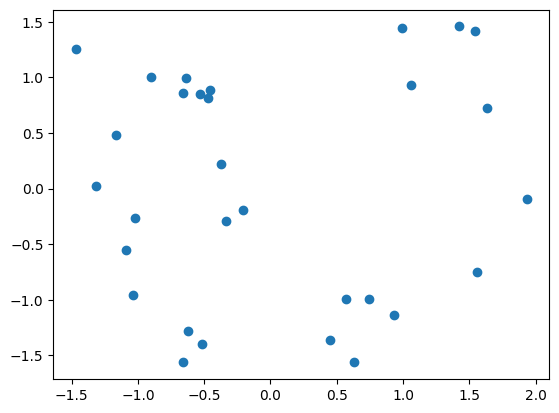

In [16]:
x = [coord[0] for coord in normed_graphs[ith_run]]
y = [coord[1] for coord in normed_graphs[ith_run]]
plt.scatter(x,y)
plt.show()

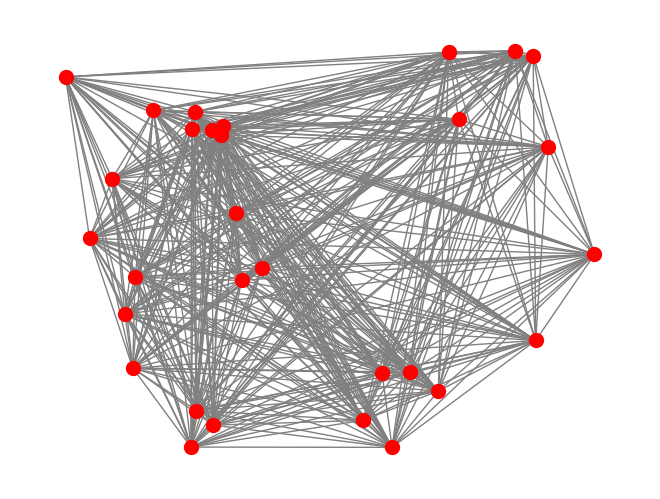

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
positions = {i: (x[i], y[i]) for i in range(len(x))}
G.add_nodes_from(positions.keys())
edges = [(i, j) for i in range(len(x)) for j in range(i + 1, len(x))]
G.add_edges_from(edges)
#plt.figure(figsize=(4, 4))
nx.draw(G, pos=positions, node_color='red', node_size=100, edge_color='gray')
plt.show()

In [18]:
for index in normed_graphs:
  normed_graphs[index] = np.array(normed_graphs[index]).flatten()

In [19]:
len(normed_graphs[0]), normed_graphs[0]

(60,
 array([-0.53957575,  0.4398966 , -0.57636841,  0.28891542,  0.83410605,
        -0.99843048, -0.09415066,  3.08863531, -0.81233028, -0.96717734,
         0.05695089, -0.58168756,  4.00559883,  0.13658722, -0.745388  ,
        -0.19878064, -0.61743232,  2.51037189, -0.37459028,  0.04418079,
         1.20768504, -0.04250437, -0.54963843, -0.2618439 ,  1.33741181,
        -0.86102752, -0.47981997, -1.00950338, -0.64860562, -0.37099122,
         0.80669114, -0.85987892, -0.82568323, -0.3869439 , -0.3475996 ,
         0.09549198, -0.7184079 ,  0.11789276, -0.23164877,  0.38481866,
        -0.80177963, -0.53811608, -0.47814122,  2.09883731,  1.5810967 ,
        -0.36581131,  0.07663415, -0.04037545, -0.41677442, -0.76171185,
         0.60644975,  0.22005312, -0.25071462, -0.31015826, -0.18220782,
         1.05483859, -0.0163723 , -0.94961733, -0.80539512, -0.97596014]))

In [20]:
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

#### Dataloader

In [21]:
instance_dict = {'train': [], 'val': []}
dataset_sizes = {'train': 0, 'val': 0}

for i in range(len(normed_graphs)):
  if np.random.rand() < 0.8:
    instance_dict['train'].append(normed_graphs[i])
    dataset_sizes['train'] += 1
  else:
    instance_dict['val'].append(normed_graphs[i])
    dataset_sizes['val'] += 1

class TSPDataset(Dataset):
    def __init__(self, instances):
        self.instances = instances

    def __len__(self):
        return len(self.instances)

    def __getitem__(self, idx):
        coordinates = torch.tensor(self.instances[idx], dtype=torch.float32)
        return coordinates

datasets = {x: TSPDataset(instance_dict[x]) for x in ['train', 'val']}
dataloaders = {x: DataLoader(datasets[x], batch_size=16, shuffle=True) for x in ['train', 'val']}

for instance_data in dataloaders['train']:
    print(instance_data.shape)
    break

torch.Size([16, 60])


### The Autoencoder

In [22]:
class Autoencoder_TSP(nn.Module):
    def __init__(self, bottleneck):
        super(Autoencoder_TSP, self).__init__()

        self.sig = nn.Sigmoid()

        self.enc1 = nn.Linear(60, 45)
        self.enc2 = nn.Linear(45, bottleneck)
        self.dec1 = nn.Linear(bottleneck, 45)
        self.dec2 = nn.Linear(45, 60)

    def forward(self, x):

        x = self.enc1(x)
        x = self.sig(x)
        x = self.enc2(x)
        x = self.sig(x)
        x = self.dec1(x)
        x = self.sig(x)
        x = self.dec2(x)
        x = self.sig(x)
        x = 2*x - 1             # to re-adjust x value to the interval [-1,1]

        return x

### The Training

In [23]:
import time
from copy import deepcopy
import matplotlib.pyplot as plt

In [24]:
def train(model, criterion, optimizer, scheduler, lambda1 = 0, num_epochs = 25):

  since = time.time()

  best_model_wts = deepcopy(model.state_dict())
  best_loss = 1000

  _loss = {'train': [], 'val': []}

  for epoch in range(num_epochs):
    if (epoch+1) % 10 == 0 or epoch == 0:
      print(f'\nEpoch {epoch+1}/{num_epochs}')
      print('-' * 10)

    # each epoch has a training and validation phase
    for phase in ['train', 'val']:
      if phase == 'train':
        model.train()     # set model to training mode
      else:
        model.eval()      # set model to validation mode

      running_loss = 0

      # iterate over data
      for inputs in dataloaders[phase]:
        inputs = inputs.to(device)
        # .to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        with torch.set_grad_enabled(phase == 'train'):
          output = model(inputs)
          loss = criterion(output, inputs)

          # Regularization if necessary

          # backward + optimize only if training
          if phase == 'train':
            loss.backward()
            optimizer.step()

        running_loss += loss.item()

      if phase == 'train':
        scheduler.step()

      epoch_loss = running_loss/dataset_sizes[phase]

      if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'{phase} Loss: {epoch_loss:.4f}')

      _loss[phase].append(epoch_loss)

      if phase == 'val' and epoch_loss < best_loss:
        best_loss = epoch_loss
        best_model_wts = deepcopy(model.state_dict())

  time_elapsed = time.time() - since
  print(f'Training completed in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
  print(f'Best val loss: {best_loss:.4f}')

  # Load best model weights and return
  model.load_state_dict(best_model_wts)
  return model, _loss

In [25]:
# using GPU/CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [26]:
lambda1 = [1e-6]#, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
lr = [0.5]#, 0.003, 0.005, 0.005, 0.008, 0.01]
Loss = {'train': [], 'val': []}
bottleneck = 30

for i in range(len(lambda1)):

  print(f"Training with lambda2 = {lambda1[i]}")
  net = Autoencoder_TSP(bottleneck)
  net.to(device)
  criterion = nn.MSELoss()
  optimizer = optim.SGD(net.parameters(), lr = lr[i], momentum = 0.9)
  scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 10, gamma = 0.5)
  num_epochs = 100

  net, _loss = train(net, criterion, optimizer, scheduler, lambda1[i], num_epochs)

  for phase in ['train', 'val']:
    Loss[phase].append(_loss[phase])

  print('='*20)

Training with lambda2 = 1e-06

Epoch 1/100
----------
train Loss: 0.0760
val Loss: 0.1117

Epoch 10/100
----------
train Loss: 0.0753
val Loss: 0.1131

Epoch 20/100
----------
train Loss: 0.0742
val Loss: 0.1118

Epoch 30/100
----------
train Loss: 0.0733
val Loss: 0.1127

Epoch 40/100
----------
train Loss: 0.0739
val Loss: 0.1112

Epoch 50/100
----------
train Loss: 0.0737
val Loss: 0.1105

Epoch 60/100
----------
train Loss: 0.0737
val Loss: 0.1134

Epoch 70/100
----------
train Loss: 0.0735
val Loss: 0.1129

Epoch 80/100
----------
train Loss: 0.0737
val Loss: 0.1127

Epoch 90/100
----------
train Loss: 0.0733
val Loss: 0.1110

Epoch 100/100
----------
train Loss: 0.0734
val Loss: 0.1129
Training completed in 0m 2s
Best val loss: 0.1095


# EDA

`data tensor = A[graph_index][data for each relax param]`

`data = [A,pf,estd,eavg,emin]`

In [27]:
ith_graph = np.random.randint(100)
values = runs[ith_graph]
As = [value[0] for value in values]
pfs = [value[1] for value in values]
estds = [value[2] for value in values]
eavs = [value[3] for value in values]
emins = [value[4] for value in values]
values[1]

[4418.75, 0.0625, 73341.6095584684, 5211.95706321217, 61899.74904315971]

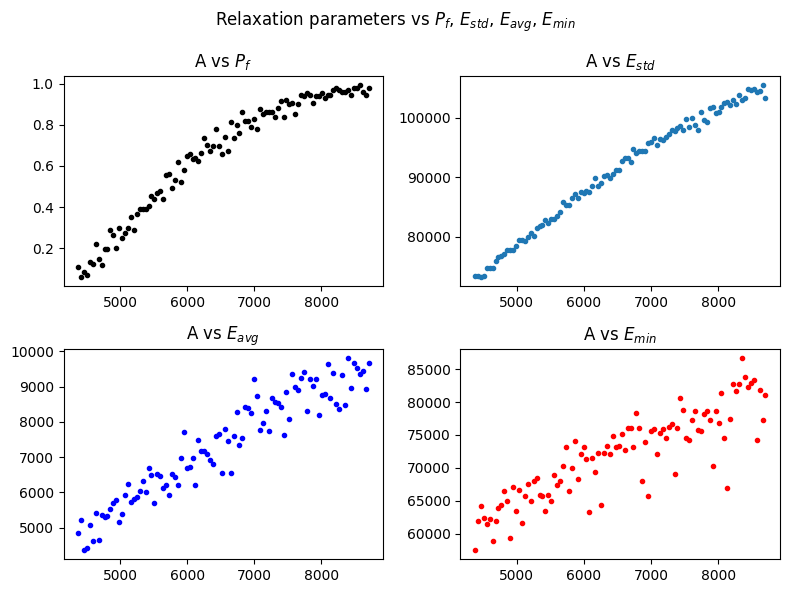

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(8,6))
fig.suptitle('Relaxation parameters vs $P_f$, $E_{std}$, $E_{avg}$, $E_{min}$')

axs[0, 0].set_title("A vs $P_f$")
axs[0, 0].scatter(As, pfs, marker = ".", c = 'k')

axs[0, 1].set_title("A vs $E_{std}$")
axs[0, 1].scatter(As, estds, marker = ".")

axs[1, 0].set_title("A vs $E_{avg}$")
axs[1, 0].scatter(As, eavs, marker = ".", c ='b')

axs[1, 1].set_title("A vs $E_{min}$")
axs[1, 1].scatter(As, emins, marker = ".", c='r')

fig.tight_layout()
fig.savefig('datavis_qross.png')

# Next steps for the project

Our QROSS-based project addresses optimizing relaxation parameters for TSP instances using QUBO formulations and surrogate models. The key challenges include creating usable feature vectors for the neural network and understanding how the training process aligns these vectors with relaxation parameters.

My Plan:

1. **Feature Vector Extraction**:  Use GCNs or similar methods to process graph inputs and produce fixed-size feature vectors. Still have to figure this out. (currently doing so). Hence we build a sort of **FEATURE EXTRACTOR function/class** for each graph **instance**.
2. **Find the min relaxation parameter**: We then assign relaxation parameters from the **data** where P_f is maximized and energy metrics are minimized for training graphs. For this we make a function called a **Min_relaxation_finder**
3. **Train NN based on these min A and the graph feature vectors as the input**:  We then train the model (input → graph feature vector, output → relaxation parameter) using loss functions with `min_relaxation_parameter` as the marker which will use gradient descent etc to backpropagate and thus train our model.
4. **Predict A from test data set for each instance in the test set**: For the test data, we first put them through the FEATURE EXTRACTOR function/class to get the feature vectors of the test graphs annd then retrieve the predicted relaxation parameter for each graph.
5. **Validation**: Now we have the predicted **A**, then we can put the $i^{th}$ graph's data matrix into the min_relaxation_finder function to find the A_min for the particular instance. Then our validation loss shall be (`predicted_A` - `min_A`$)^2$ which should be ideally very very low.

# OPTIMAL A VECTOR for both training and testing data`min_relaxation_param` function

In [92]:
def min_relaxation_params(data_dict, lambda_1=5.0, lambda_2=1.0):

  optimal_A_dict = {}

  for idx, data_matrix in data_dict.items():
    data_matrix = np.array(data_matrix)
    A_values = data_matrix[:][0]
    P_f = data_matrix[:][1]
    E_avg = data_matrix[:][2]
    E_std = data_matrix[:][3]
    E_min = data_matrix[:][4]

    scores = lambda_1 * P_f - lambda_2 * (E_avg + E_std + E_min)
    best_index = np.argmax(scores)

    optimal_A_dict[idx] = A_values[best_index]

  return optimal_A_dict

In [93]:
np.asarray(runs[0]).shape, type(runs), len(runs)

((100, 5), dict, 85)

In [94]:
min_relaxations = min_relaxation_params(runs)
type(min_relaxations)

dict

In [95]:
min_relaxations

{0: 19742.68658959116,
 1: 11624.152000070813,
 2: 0.0,
 3: 11506.749468451164,
 4: 18246.745018940368,
 5: 16491.04149047193,
 6: 20442.571485561864,
 7: 17426.207328027966,
 8: 0.0,
 9: 10185.40627015858,
 10: 7717.078702199341,
 11: 15790.34150683544,
 12: 18567.23992090268,
 13: 16704.28466084302,
 14: 18894.239826881414,
 15: 68537.17944943796,
 16: 73729.92762407339,
 17: 71523.61410078392,
 18: 76842.98970748132,
 19: 72229.4909184825,
 20: 77300.68921104146,
 21: 82534.79916936645,
 22: 74228.41565754259,
 23: 76991.24839892563,
 24: 75592.60232978663,
 25: 73988.25920308115,
 26: 78787.26530533658,
 27: 87120.74921811942,
 28: 72684.38739915902,
 29: 69358.95123947253,
 30: 80719.279308477,
 31: 83935.9135087967,
 32: 77628.33783257734,
 33: 82361.63150910153,
 34: 73356.46366435052,
 35: 66520.56738166166,
 36: 76001.08928002197,
 37: 75178.56972050073,
 38: 77326.43231809612,
 39: 76866.22702002636,
 40: 77928.8618546301,
 41: 75801.35170391705,
 42: 73890.14344464957,
 43: 

# Graph FEATURE VECTOR EXTRACTOR

In [35]:
print(f"We have {len(graphs)} graphs which have {len(graphs[0])} nodes each with {len(graphs[0][0])} coordinates.")

We have 85 graphs which have 30 nodes each with 2 coordinates.


In [38]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, global_mean_pool

num_graphs = len(graphs)
num_nodes = len(graphs[0])
input_dim = len(graphs[0][0])

In [39]:
def compute_adjacency(coords):
    num_nodes = coords.shape[0]
    adjacency_matrix = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            adjacency_matrix[i, j] = np.sqrt((coords[i, 0] - coords[j, 0])**2 + (coords[i, 1] - coords[j, 1])**2)
    return adjacency_matrix

In [42]:
graph_data_list = []
for i in range(num_graphs):
    coords = graphs[i]
    adjacency_matrix = compute_adjacency(np.array(coords))

    edge_index = np.array(np.nonzero(adjacency_matrix)).astype(np.int64)
    edge_weight = adjacency_matrix[edge_index[0], edge_index[1]]

    # Convert to PyTorch tensors
    edge_index = torch.tensor(edge_index, dtype=torch.long)
    edge_weight = torch.tensor(edge_weight, dtype=torch.float32)
    node_features = torch.tensor(coords, dtype=torch.float32)

    # Create graph data object
    data = Data(x=node_features, edge_index=edge_index, edge_attr=edge_weight)
    graph_data_list.append(data)

In [ ]:
type(graph_data_list[0])

In [44]:
print(f"We got graph data list for each {len(graph_data_list)} graphs in the samples we took for experiment of the graph pooling")

We got graph data list for each 85 graphs in the samples we took for experiment of the graph pooling


In [45]:
class GraphFeatureExtractor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphFeatureExtractor, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = global_mean_pool(x, torch.zeros(x.size(0), dtype=torch.long))  # Graph-level pooling
        x = self.fc(x)
        return x

In [46]:
#initialize the Graph convolutional neural network
hidden_dim = 64 # neurons in hidden layer
output_dim = 128 # dimension of the graph feature vector
model = GraphFeatureExtractor(input_dim, hidden_dim, output_dim) # instantiate the model

graph_tensor = graph_data_list[0]
graph_feature_vector = model(graph_tensor)

In [53]:
# Batch processing for multiple graphs
from torch_geometric.loader import DataLoader

loader = DataLoader(graph_data_list, batch_size=2, shuffle=True)
batch_graph_features_vector = []
for batch in loader:
    batch_graph_features = model(batch)  # Batch graph-level features
    batch_graph_features_vector.append(batch_graph_features)

In [61]:
len(batch_graph_features_vector[0][0])

128

# Big mistake do not simply encode the graphs! Train them to yield good predictions.

In [102]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import random

class GraphFeatureExtractor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphFeatureExtractor, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.global_pool = nn.AdaptiveAvgPool1d(1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        return x.mean(dim=0)

In [103]:
def generate_edge_index(num_nodes):
    edge_index = []
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                edge_index.append([i, j])
    return torch.tensor(edge_index, dtype=torch.long).t().contiguous()

# Dataset Preparation
def prepare_dataset(graphs_dict, optimal_A):
    dataset = []
    for idx, coords in graphs_dict.items():
        x = torch.tensor(coords, dtype=torch.float32)  # Node features (coordinates)
        edge_index = generate_edge_index(x.shape[0])  # Fully connected graph
        y = torch.tensor([optimal_A[idx]], dtype=torch.float32)  # Target relaxation parameter
        data = Data(x=x, edge_index=edge_index, y=y)
        dataset.append(data)
    return dataset

In [104]:
dataset = prepare_dataset(graphs,min_relaxations)

In [105]:
def split_data(graphs, optimal_A, split_ratio=0.8):
    indices = list(graphs.keys())
    random.shuffle(indices)
    split = int(len(indices) * split_ratio)
    train_indices = indices[:split]
    test_indices = indices[split:]

    train_graphs = {i: graphs[i] for i in train_indices}
    train_A = {i: optimal_A[i] for i in train_indices}
    test_graphs = {i: graphs[i] for i in test_indices}
    test_A = {i: optimal_A[i] for i in test_indices}

    return train_graphs, train_A, test_graphs, test_A

In [106]:
def train_model(model, train_loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = criterion(out.squeeze(), data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

In [122]:
def validate_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0.0
    predicted = []
    actual = []

    with torch.no_grad():
        for data in test_loader:
            data = data.to(device)  # Ensure data is on the same device as the model
            out = model(data.x, data.edge_index).squeeze()

            # Ensure out and data.y have the same shape for loss calculation
            loss = criterion(out, data.y)
            total_loss += loss.item()

            # Append predictions and actual values for further analysis
            predicted.extend(out.tolist())  # Convert to list and extend for batch predictions
            actual.extend(data.y.tolist())  # Convert target tensor to list and extend

    return total_loss / len(test_loader), predicted, actual

In [109]:
train_graphs, train_A, test_graphs, test_A = split_data(graphs,min_relaxations)

In [117]:
list(test_graphs.keys()) == list(test_A.keys()) # just checking

True

In [119]:
train_dataset = prepare_dataset(train_graphs, train_A)
test_dataset = prepare_dataset(test_graphs, test_A)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [130]:
input_dim = 2
hidden_dim = 16
output_dim = 1
model = GraphFeatureExtractor(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

train_losses =[]
epochs = 200
for epoch in range(epochs):
    train_loss = train_model(model, train_loader, optimizer, criterion)
    train_losses.append(train_loss)
    #val_loss, predicted, actual = validate_model(model, test_loader, criterion)
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}")

Epoch 1/200, Train Loss: 2413920867.5556
Epoch 2/200, Train Loss: 2360981582.2222
Epoch 3/200, Train Loss: 2153510343.1111
Epoch 4/200, Train Loss: 1921972736.0000
Epoch 5/200, Train Loss: 1748216078.2222
Epoch 6/200, Train Loss: 1483858844.4444
Epoch 7/200, Train Loss: 1318374570.6667
Epoch 8/200, Train Loss: 1179287409.7778
Epoch 9/200, Train Loss: 1116367964.4444
Epoch 10/200, Train Loss: 1039686805.3333
Epoch 11/200, Train Loss: 985816348.4444
Epoch 12/200, Train Loss: 1015566791.1111
Epoch 13/200, Train Loss: 1027868764.4444
Epoch 14/200, Train Loss: 980328490.6667
Epoch 15/200, Train Loss: 986339642.6667
Epoch 16/200, Train Loss: 1012581546.6667
Epoch 17/200, Train Loss: 1045489962.6667
Epoch 18/200, Train Loss: 911504876.0000
Epoch 19/200, Train Loss: 1096437233.7778
Epoch 20/200, Train Loss: 974222407.1111
Epoch 21/200, Train Loss: 1030290204.4444
Epoch 22/200, Train Loss: 961292087.1111
Epoch 23/200, Train Loss: 1042157468.4444
Epoch 24/200, Train Loss: 1053229496.8889
Epoch 2

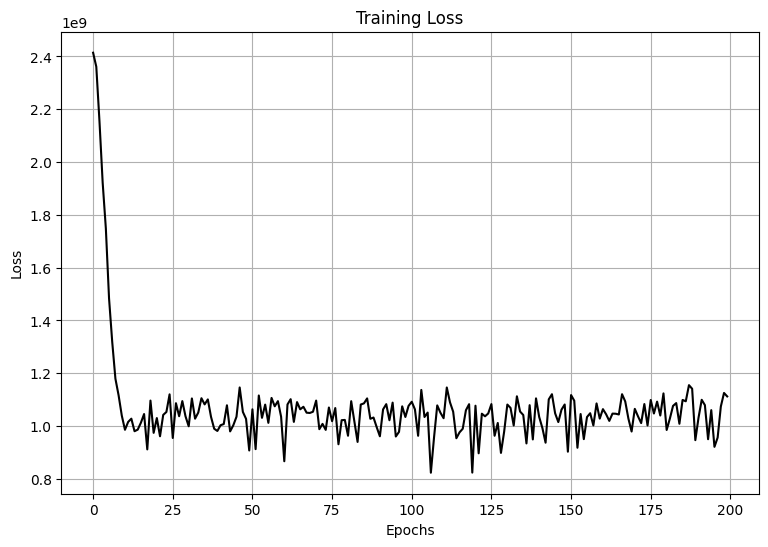

In [136]:
plt.figure(figsize=(9,6))
plt.plot(train_losses, c = "k", ls="-")
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

In [121]:
validation_vector = [(pred - act) ** 2 for pred, act in zip(predicted, actual)]
print(f"Validation Vector: {validation_vector}")

NameError: name 'predicted' is not defined

# **OUR FEATURE VECTOR MODEL IS TRAINED.**

# Next steps
Okay so now we have a dictionary of the best or most preferable relaxation parameters. We also have corresponding feature vectors for each graph.

## Now we build the QROSS Neural Network to predict the relaxation parameters.
Steps:
1. We have all "optimal" relaxation values. We now split it between training and testing. We will train using backprop and gd on the training set on these optimal relaxation values.
2. Then we will predict these using our neural network, and then lastly we shall work out prediction accuracy and validate the results.

**Let the training begin**